# Задание 1

1. Реализовать kmeans
2. Визуализировать сходимость центров кластеров
3. Оценить  SSE  для значений  k=1,…,10  и построить график зависимости  SSE  от количества кластеров.




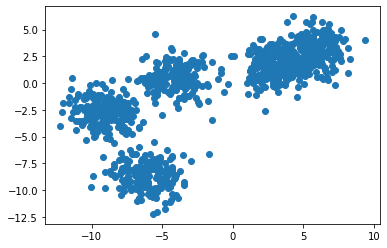

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_blobs


X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [2]:
def KMeans_plot(X, K, eps, n_iter):
  output = {}
  m = X.shape[0]
  n = X.shape[1]
  centroids = np.array([]).reshape(n,0)
  for i in range(K):
      rand = random.randint(0,m-1)
      centroids = np.c_[centroids, X[rand]] 
  for i in range(n_iter):  
      distance = np.array([]).reshape(m,0)
      for k in range(K):
          tempDist = np.sum((X - centroids[:,k])**2, axis=1)
          distance = np.c_[distance,tempDist]
      min = np.argmin(distance, axis=1)+1
      clusters = {}
      for k in range(K):
          clusters[k+1] = np.array([]).reshape(2,0)
      for i in range(m):
          clusters[min[i]] = np.c_[clusters[min[i]],X[i]]
      plt.figure()
      for k in range(K):
          clusters[k+1] = clusters[k+1].T
          plt.scatter(clusters[k+1][:,0],clusters[k+1][:,1])
      plt.scatter(centroids[0,:],centroids[1,:],s=300,c='black')
      old_centroids = centroids.copy()
      for k in range(K):
          centroids[:,k] = np.mean(clusters[k+1],axis=0)
      output = clusters
      if (abs(centroids - old_centroids < eps).all()):
        break
  return output, centroids

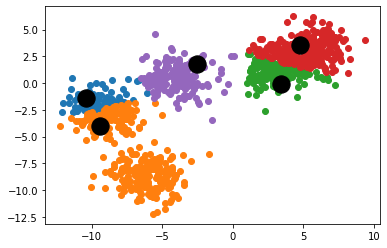

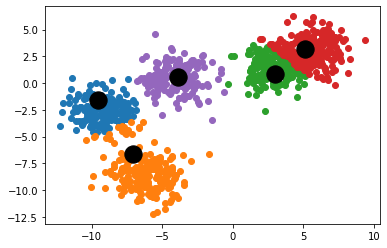

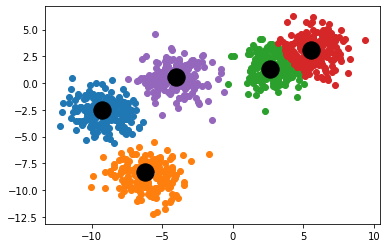

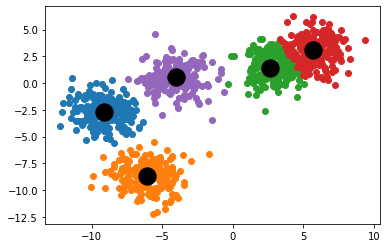

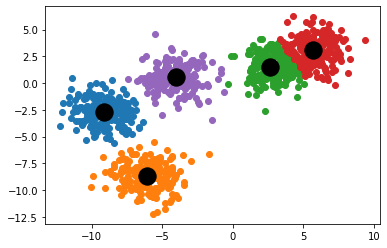

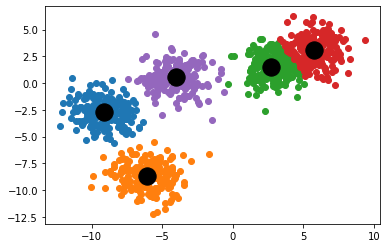

In [3]:
clusters, centroids = KMeans_plot(X, 5, 0.001, 100)

In [4]:
def KMeans(X, K, eps, n_iter):
  output = {}
  m = X.shape[0]
  n = X.shape[1]
  centroids = np.array([]).reshape(n,0)
  for i in range(K):
      rand = random.randint(0,m-1)
      centroids = np.c_[centroids, X[rand]] 
  for i in range(n_iter):  
      distance = np.array([]).reshape(m,0)
      for k in range(K):
          tempDist = np.sum((X - centroids[:,k])**2, axis=1)
          distance = np.c_[distance,tempDist]
      min = np.argmin(distance, axis=1)+1
      clusters = {}
      for k in range(K):
          clusters[k+1] = np.array([]).reshape(2,0)
      for i in range(m):
          clusters[min[i]] = np.c_[clusters[min[i]],X[i]]
      for k in range(K):
          clusters[k+1] = clusters[k+1].T
      old_centroids = centroids.copy()
      for k in range(K):
          centroids[:,k] = np.mean(clusters[k+1],axis=0)
      output = clusters
      if (abs(centroids - old_centroids < eps).all()):
        break
  return output, centroids

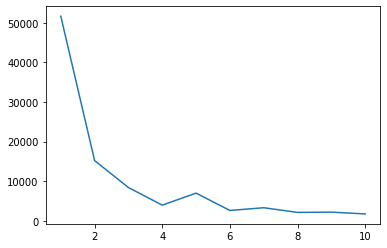

In [5]:
SSE_array=np.array([])
for K in range(1,11):
    clusters, centroids=KMeans(X, K, 0.001, 100)
    SSE=0
    for k in range(K):
        SSE+=np.sum((clusters[k+1]-centroids.T[k,:])**2)
    SSE_array=np.append(SSE_array,SSE)
plt.plot(np.arange(1,11,1),SSE_array)
plt.show()

# Задание 2

1. Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)
2. Кластеризуйте данные с помощью KMeans из sklearn.clustering. Найдите оптимальное число кластеров
3. Произведите анализ получившихся кластеров:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/julia-komleva/ml-course-2021/main/data/2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Состояние     35019 non-null  object 
 3   Пробег        35019 non-null  float64
 4   Объем         35019 non-null  float64
 5   Топливо       35019 non-null  object 
 6   Мощность      35019 non-null  float64
 7   Кузов         35019 non-null  object 
 8   Привод        35019 non-null  object 
 9   КПП           35019 non-null  object 
 10  Руль          35019 non-null  object 
 11  Хозяев в ПТС  35019 non-null  object 
 12  Цена          35019 non-null  float64
dtypes: float64(5), object(8)
memory usage: 3.7+ MB


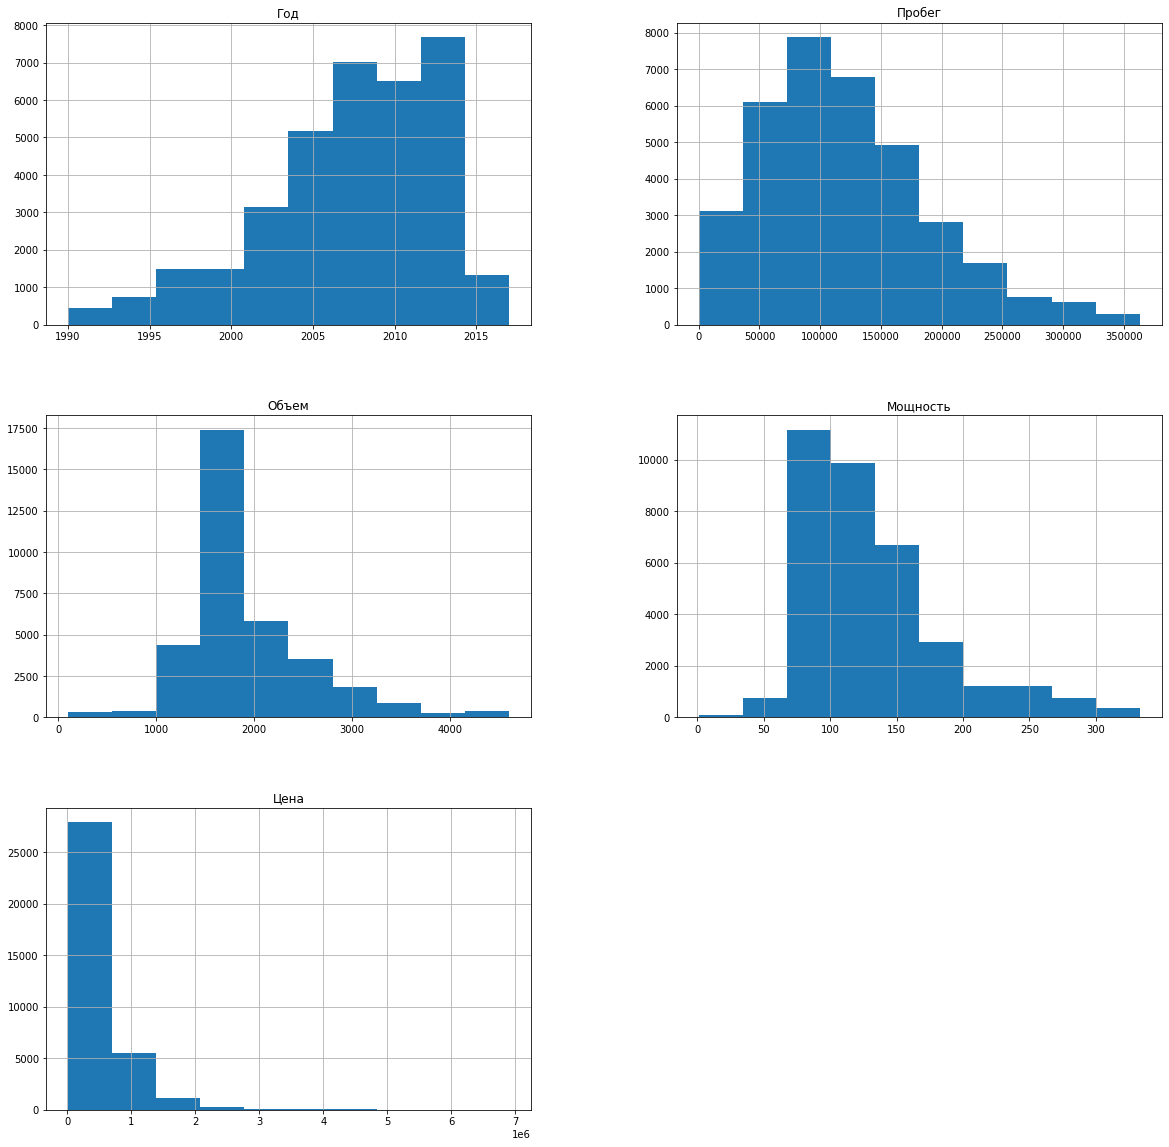

In [8]:
hist = df.hist(figsize=(20,20))

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

numeric_df = df.select_dtypes(exclude="object").columns
categorial_df = df.select_dtypes(include="object").columns

In [10]:
ct = ColumnTransformer(transformers=[ 
        ('num', StandardScaler(), numeric_df),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_df)])

prep_data = ct.fit_transform(df).toarray()

In [11]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(prep_data)
df['№ кластера'] = clusters

In [12]:
prep_df = df.copy(deep=True)
labels = []
for feature in categorial_df:
  le = LabelEncoder()
  prep_df[feature] = le.fit_transform(df[feature])
  labels.append({i : f for i, f in enumerate(le.classes_.tolist())})

res = prep_df.groupby(by="№ кластера").median()
for feature, dictionary in zip(categorial_df, labels):
    res[feature] = res[feature].map(dictionary)

In [13]:
res

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
№ кластера,,,,,,,,,,,,,
0,Nissan,1999.0,БУ,245500.0,1800.0,бензин,120.0,седан,передний,автомат,правый,3 и более,185000.0
1,Opel,2012.0,БУ,62801.0,1600.0,бензин,106.0,седан,передний,механика,левый,1 владелец,459000.0
2,Mitsubishi,2007.0,БУ,146000.0,2100.0,бензин,150.0,седан,передний,автомат,левый,3 и более,470000.0
3,Nissan,2010.0,БУ,90000.0,1600.0,бензин,105.0,седан,передний,механика,левый,2 владельца,360000.0
4,Mitsubishi,2012.0,БУ,69000.0,2000.0,бензин,156.0,кроссовер,полный,автомат,левый,1 владелец,990000.0
5,Lexus,2007.0,БУ,151000.0,3200.0,бензин,249.0,кроссовер,полный,автомат,левый,2 владельца,750000.0
6,Volkswagen,2005.0,БУ,138029.0,1500.0,бензин,86.0,седан,передний,механика,левый,3 и более,135000.0
7,Lexus,2013.0,БУ,63000.0,3000.0,дизель,249.0,кроссовер,полный,автомат,левый,1 владелец,2100000.0


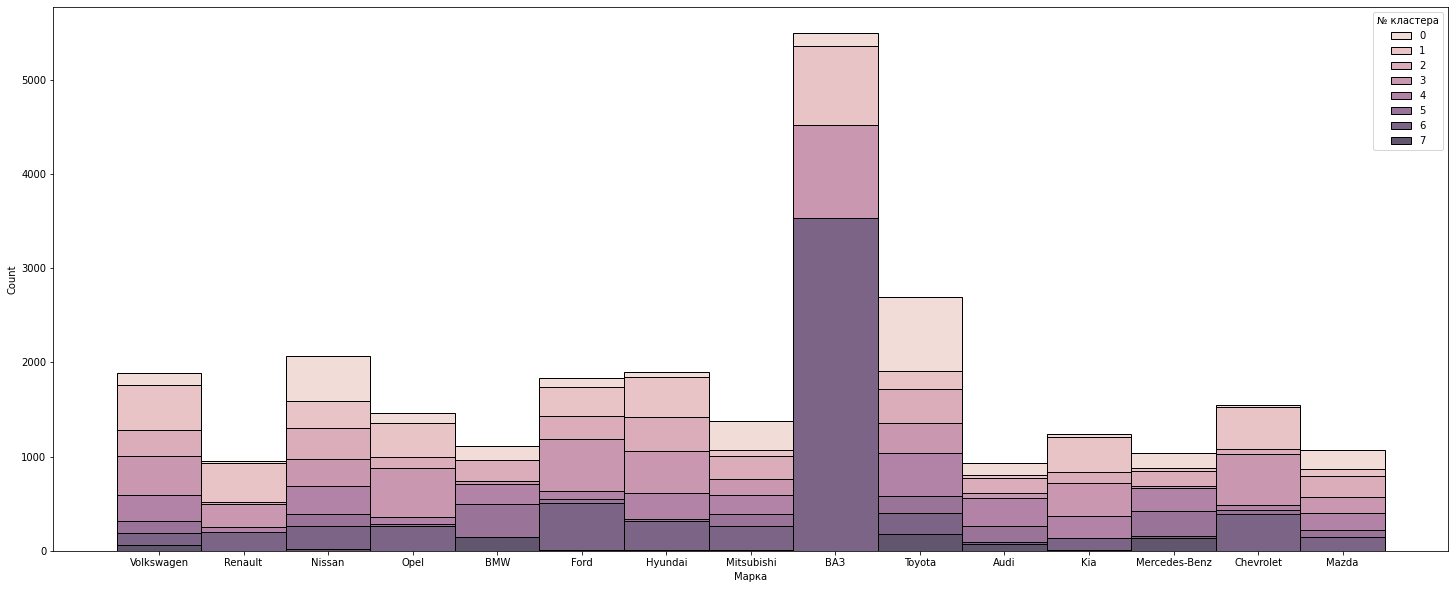

In [14]:
import seaborn as sns

describe_df = df.copy()
describe_df['№ кластера'] = clusters
top = describe_df['Марка'].value_counts()[:15].index
fig, ax = plt.subplots(figsize=(25, 10))
sns.histplot(data=describe_df[describe_df['Марка'].isin(top)], x="Марка", hue='№ кластера', multiple='stack', color=['Set1'] , ax=ax)

1 кластер - праворульные старые японские авто с большим пробегом

2 кластер - леворульные отечественные и европейские авто с механической КПП и небольшим пробегом

3 кластер - леворульные европейские авто с КПП автомат и средним пробегом

4 кластер - леворульные европейские и американские авто с механической КПП и средним пробегом

5 кластер - леворульные авто с КПП автомат, небольшим пробегом и ценой около 1 миллиона

6 кластер - леворульные авто с КПП автомат, средним пробегом и ценой около 750 тыс.

7 кластер - леворульные дешевые авто, в основном отечественные, с большим пробегом и механической КПП

8 кластер - леворульные дорогие европейские и японские авто с небольшим пробегом и КПП автомат
